# Basic Usage

In this notebook, we will show some typical use cases of the API  First, we import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cechmate as cm
from persim import plot_diagrams
import tadasets

## Rips Filtrations

First, we show how to do a rips filtration (NOTE: The [ripser.py](https://github.com/scikit-tda/ripser.py) library is strongly recommended in this case, so this is mainly to show syntax)

In [2]:
# Initialize a noisy circle
X = tadasets.dsphere(n=100, d=1, r=1, noise=0.2)

In [3]:
# Instantiate and build a rips filtration
rips = cm.Rips(maxdim=1) #Go up to 1D homology
rips.build(X)
dgmsrips = rips.diagrams()

Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 1.58)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.559)


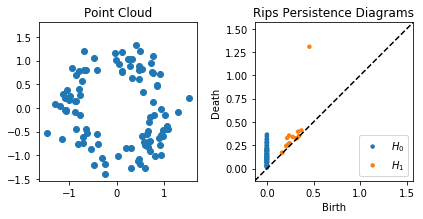

In [4]:
plt.figure()
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('square')
plt.title("Point Cloud")
plt.subplot(122)
plot_diagrams(dgmsrips)
plt.title("Rips Persistence Diagrams")
plt.tight_layout()
plt.show()

## Cech Filtrations

Let's try computing Cech filtrations.

In [5]:
cech = cm.Cech(maxdim=1) #Go up to 1D homology
cech.build(X)
dgmscech = cech.diagrams() * 2

Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 1.53)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.924)


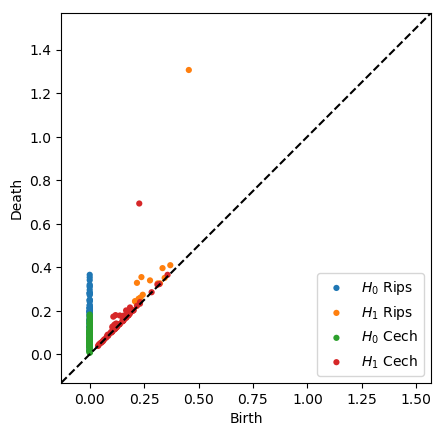

In [6]:
plot_diagrams(dgmsrips + dgmscech, labels = ['$H_0$ Rips', '$H_1$ Rips', '$H_0$ Cech', '$H_1$ Cech'])
plt.show()

## Alpha Filtrations

Now we will perform an alpha filtration on the exact same point cloud.

In [7]:
alpha = cm.Alpha()
filtration = alpha.build(2*X) # Alpha goes by radius instead of diameter
dgmsalpha = alpha.diagrams(filtration)

Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.000787)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 0.0354)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 0.00469)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.00063)


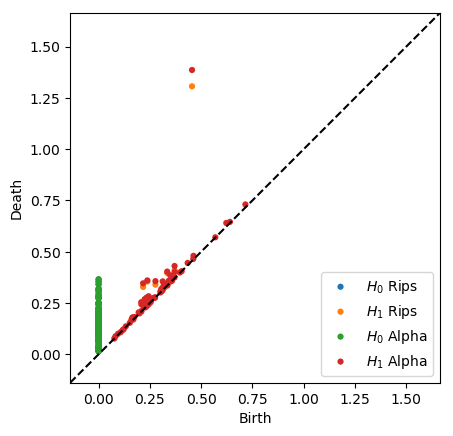

In [8]:
plot_diagrams(dgmsrips + dgmsalpha, labels = ['$H_0$ Rips', '$H_1$ Rips', '$H_0$ Alpha', '$H_1$ Alpha'])
plt.show()

Note that the alpha filtration is substantially faster than the Rips filtration, and it is also more geometrically accurate.  In rips, we add a triangle the moment its edges are added, but growing balls around their vertices do not necessarily cover the triangle at that point, as they are in the Cech filtration.  Alpha is the intersection of Cech balls with Voronoi regions, so it is a strict subset of Cech.  Hence, it takes a larger scale to add triangles, so the classes die slightly later.

Now let's try an example with a 400 points sampled from a 4-sphere in 5 dimensions.

Doing spatial.Delaunay triangulation...
Finished spatial.Delaunay triangulation (Elapsed Time 0.775)
Building alpha filtration...
Finished building alpha filtration (Elapsed Time 78.5)
Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 1.51)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 0.161)


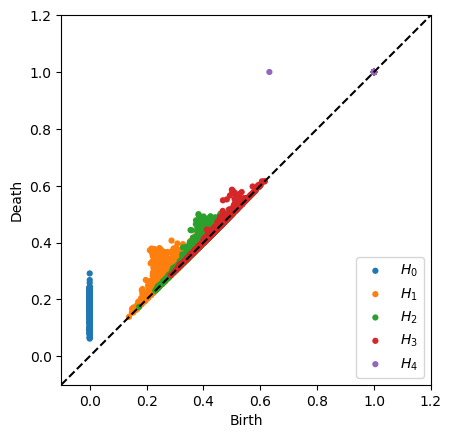

In [9]:
X = tadasets.dsphere(n=400, r=1, d=4)

alpha = cm.Alpha()
filtration = alpha.build(X)
dgms = alpha.diagrams(filtration)
plot_diagrams(dgms)
plt.show()

As expected, the only nontrivial homology is in $H_4$.  

Normally computing $H_4$ with that number of points would grind Rips to a halt, but it runs in a reasonable amount of time with Alpha. The bottleneck with Alpha is constructing the filtration and computing many circumcenters. Note that computing the persistence pairs takes even less time than H1 for Rips with only 100 points shown above.

## Custom filtration

If you have a point cloud and a set of simplices with times at which they are added, you can compute the persistence diagrams associated to the custom filtration you've defined. For instance, assume we want to compute a filtration where 4 vertices enter at time 0 and the edges and triangles are added in the pattern below (note how the triangles are not added the moment all of their edges are added, unlike Rips):

<img src = "CustomExample.svg">

Then we can execute the following code:

In [10]:
filtration = [([0], 0), 
            ([1], 0), 
            ([2], 0), 
            ([3], 0), 
            ([0, 1], 1),
            ([0, 2], 1),
            ([1, 2], 2),
            ([0, 1, 2], 4),
            ([0, 3], 2),
            ([2, 3], 3),
            ([0, 2, 3], 6)]
#Compute persistence diagrams
dgms = cm.phat_diagrams(filtration, show_inf = True)
print("H0:\n", dgms[0])
print("H1:\n", dgms[1])

Constructing boundary matrix...
Finished constructing boundary matrix (Elapsed Time 8.75e-05)
Computing persistence pairs...
Finished computing persistence pairs (Elapsed Time 5.08e-05)
H0:
 [[ 0.  1.]
 [ 0.  1.]
 [ 0.  2.]
 [ 0. inf]]
H1:
 [[2 4]
 [3 6]]
